In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
df=pd.read_csv("ElectricCarData_Clean_Me.csv")
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,INR
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,460,70.0,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480,4540988.068
1,Volkswagen,ID.3 Pure,10.0,160,270,45.0,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000,2455473.000
2,Polestar,2,4.7,210,400,75.0,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440,4619563.204
3,BMW,iX3,6.8,180,360,74.0,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040,5569012.764
4,Honda,e,9.5,145,170,28.5,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997,2700774.753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Nissan,Ariya 63kWh,7.5,160,330,63.0,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000,3683209.500
98,Audi,e-tron S Sportback 55 quattro,4.5,210,335,86.5,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050,7861606.055
99,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,63.0,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000,4092455.000
100,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,87.0,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000,5320191.500


In [3]:
df.shape

(102, 16)

In [4]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Battery_Pack Kwh', 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge',
       'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro',
       'INR'],
      dtype='object')

In [5]:
df.info

<bound method DataFrame.info of           Brand                            Model  AccelSec  TopSpeed_KmH  \
0         Tesla    Model 3 Long Range Dual Motor       4.6           233   
1    Volkswagen                        ID.3 Pure      10.0           160   
2      Polestar                                2       4.7           210   
3           BMW                              iX3       6.8           180   
4         Honda                                e       9.5           145   
..          ...                              ...       ...           ...   
97       Nissan                      Ariya 63kWh       7.5           160   
98         Audi    e-tron S Sportback 55 quattro       4.5           210   
99       Nissan              Ariya e-4ORCE 63kWh       5.9           200   
100      Nissan  Ariya e-4ORCE 87kWh Performance       5.1           200   
101       Byton                M-Byte 95 kWh 2WD       7.5           190   

     Range_Km  Battery_Pack Kwh  Efficiency_WhKm  FastCharge_KmH RapidCharge  \
0         460              70.0              161             940         Yes   
1         270              45.0              167             250         Yes   
2         400              75.0              181             620         Yes   
3         360              74.0              206             560         Yes   
4         170              28.5              168             190         Yes   
..        ...               ...              ...             ...         ...   
97        330              63.0              191             440         Yes   
98        335              86.5              258             540         Yes   
99        325              63.0              194             440         Yes   
100       375              87.0              232             450         Yes   
101       400              95.0              238             480         Yes   

    PowerTrain    PlugType  BodyStyle Segment  Seats  PriceEuro          INR  
0          AWD  Type 2 CCS      Sedan       D      5      55480  4540988.068  
1          RWD  Type 2 CCS  Hatchback       C      5      30000  2455473.000  
2          AWD  Type 2 CCS   Liftback       D      5      56440  4619563.204  
3          RWD  Type 2 CCS        SUV       D      5      68040  5569012.764  
4          RWD  Type 2 CCS  Hatchback       B      4      32997  2700774.753  
..         ...         ...        ...     ...    ...        ...          ...  
97         FWD  Type 2 CCS  Hatchback       C      5      45000  3683209.500  
98         AWD  Type 2 CCS        SUV       E      5      96050  7861606.055  
99         AWD  Type 2 CCS  Hatchback       C      5      50000  4092455.000  
100        AWD  Type 2 CCS  Hatchback       C      5      65000  5320191.500  
101        AWD  Type 2 CCS        SUV       E      5      62000  5074644.200  

[102 rows x 16 columns]>

In [7]:
df.isnull().sum()

,0
Brand,0
Model,0
AccelSec,0
TopSpeed_KmH,0
Range_Km,0
Battery_Pack Kwh,0
Efficiency_WhKm,0
FastCharge_KmH,0
RapidCharge,0
PowerTrain,0


In [8]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,INR
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,1.020000e+02
mean,7.391176,179.313725,338.627451,65.415686,189.303922,435.686275,4.882353,55997.588235,4.583352e+06
std,3.031913,43.771228,126.700623,29.955782,29.679072,220.447384,0.799680,34250.724403,2.803391e+06
min,2.100000,123.000000,95.000000,16.700000,104.000000,0.000000,2.000000,20129.000000,1.647541e+06
25%,5.100000,150.000000,250.000000,43.125000,168.000000,260.000000,5.000000,34414.750000,2.816816e+06
50%,7.300000,160.000000,340.000000,64.350000,180.500000,440.000000,5.000000,45000.000000,3.683210e+06
75%,9.000000,200.000000,400.000000,83.700000,204.500000,557.500000,5.000000,65000.000000,5.320192e+06
max,22.400000,410.000000,970.000000,200.000000,273.000000,940.000000,7.000000,215000.000000,1.759756e+07


Disviding vehicle prices above and below INR 3750000

In [22]:
df['CarName'] = df['Brand'] + '-' + df['Model']
df_1= df.loc[df['INR'] <=3750000]
df_2 = df.loc[df['INR'] >3750000]

In [23]:
len(df_1), len(df_2)

(54, 48)

Count plot for power train

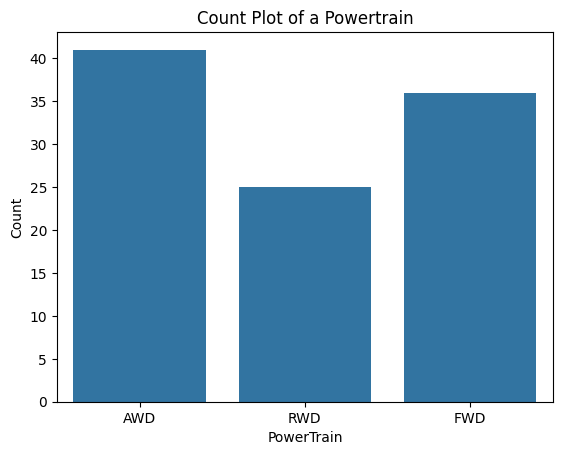

In [26]:
def train(dataframe):
    sns.countplot(x=dataframe['PowerTrain'])
    plt.title('Count Plot of a Powertrain')
    plt.xlabel('PowerTrain')
    plt.ylabel('Count')

train(df)

Count plot for body style

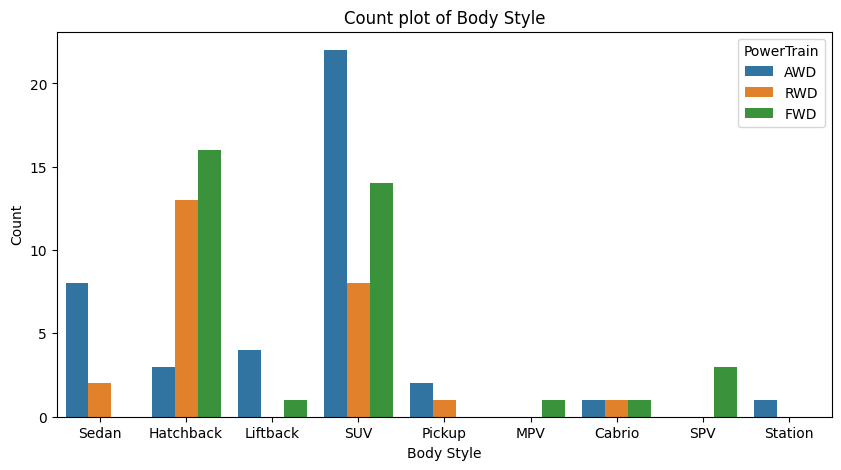

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='BodyStyle', data=df, hue='PowerTrain')
plt.title('Count plot of Body Style')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.show()

Range of Vehicles according to prices

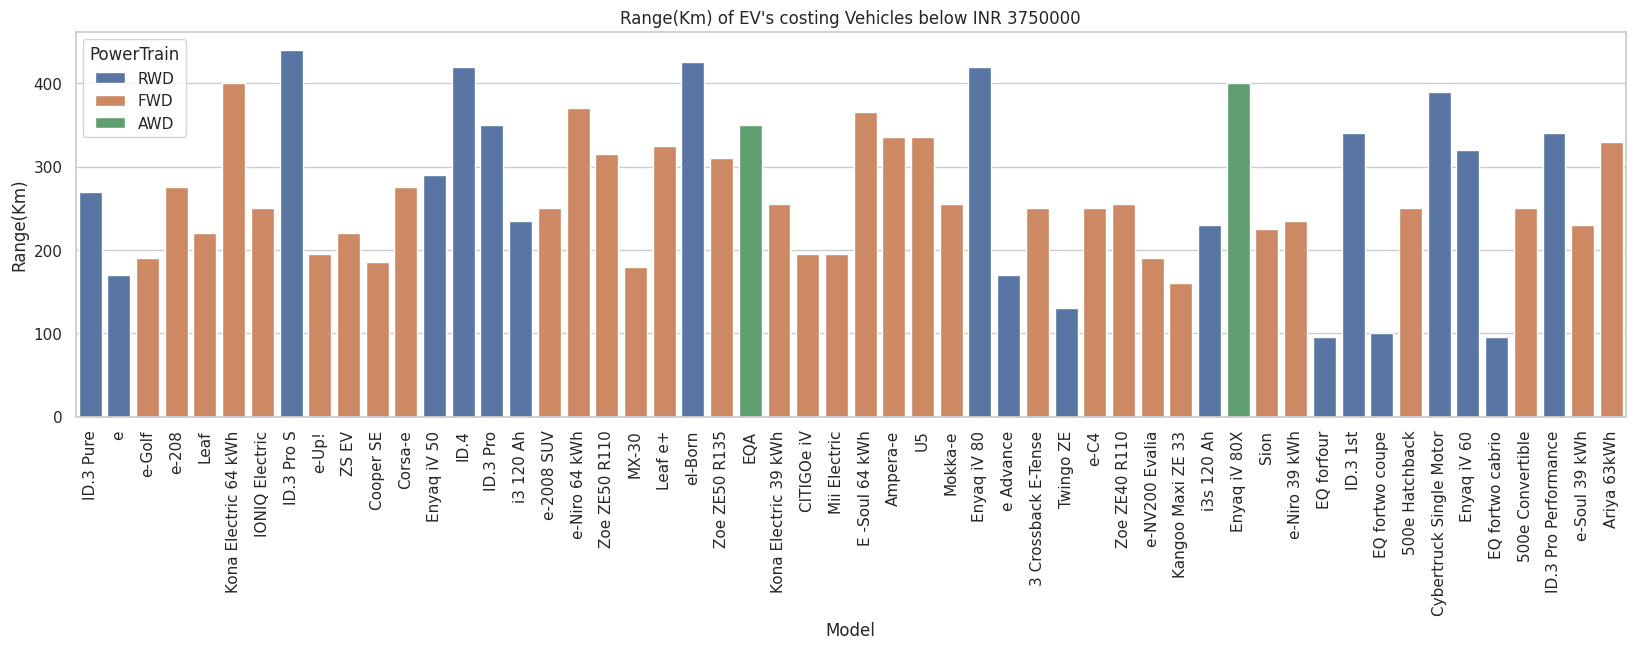

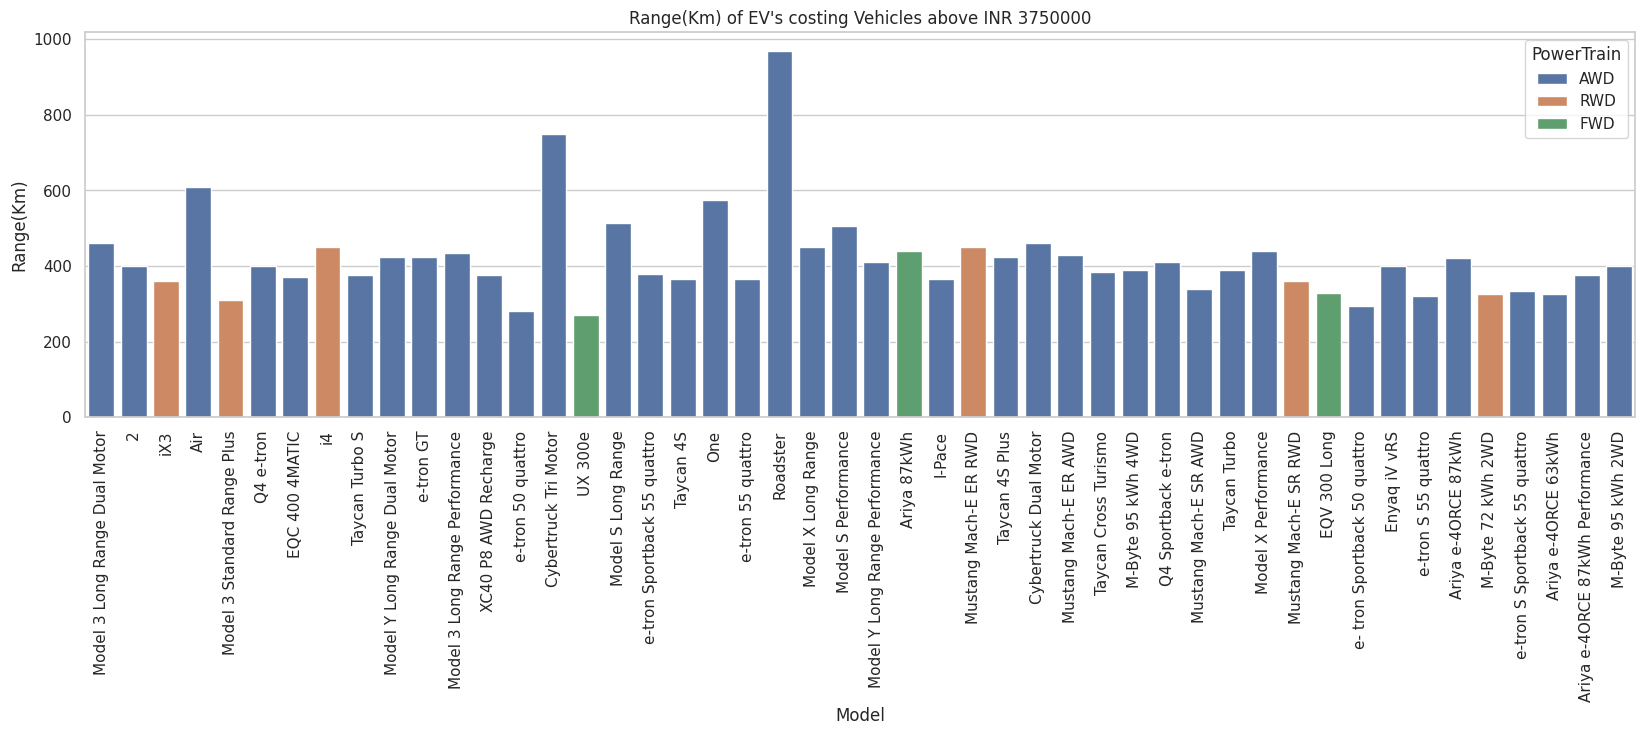

In [35]:
def range(dataframe, price):
    plt.figure(figsize=(20,5))
    sns.set_theme(style="whitegrid")
    sns.barplot(x='Model', y='Range_Km', data=dataframe, hue='PowerTrain')
    plt.title('''Range(Km) of EV's costing {}'''.format(price))
    plt.ylabel('Range(Km)')
    plt.xlabel('Model')
    plt.xticks(rotation=90)
    plt.show()


range(df_1, "Vehicles below INR 3750000")
range(df_2, "Vehicles above INR 3750000")


Range of Battery

<ipython-input-36-e348ec14a370>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  a1.set_xticklabels(df_1['CarName'], rotation = 'vertical')


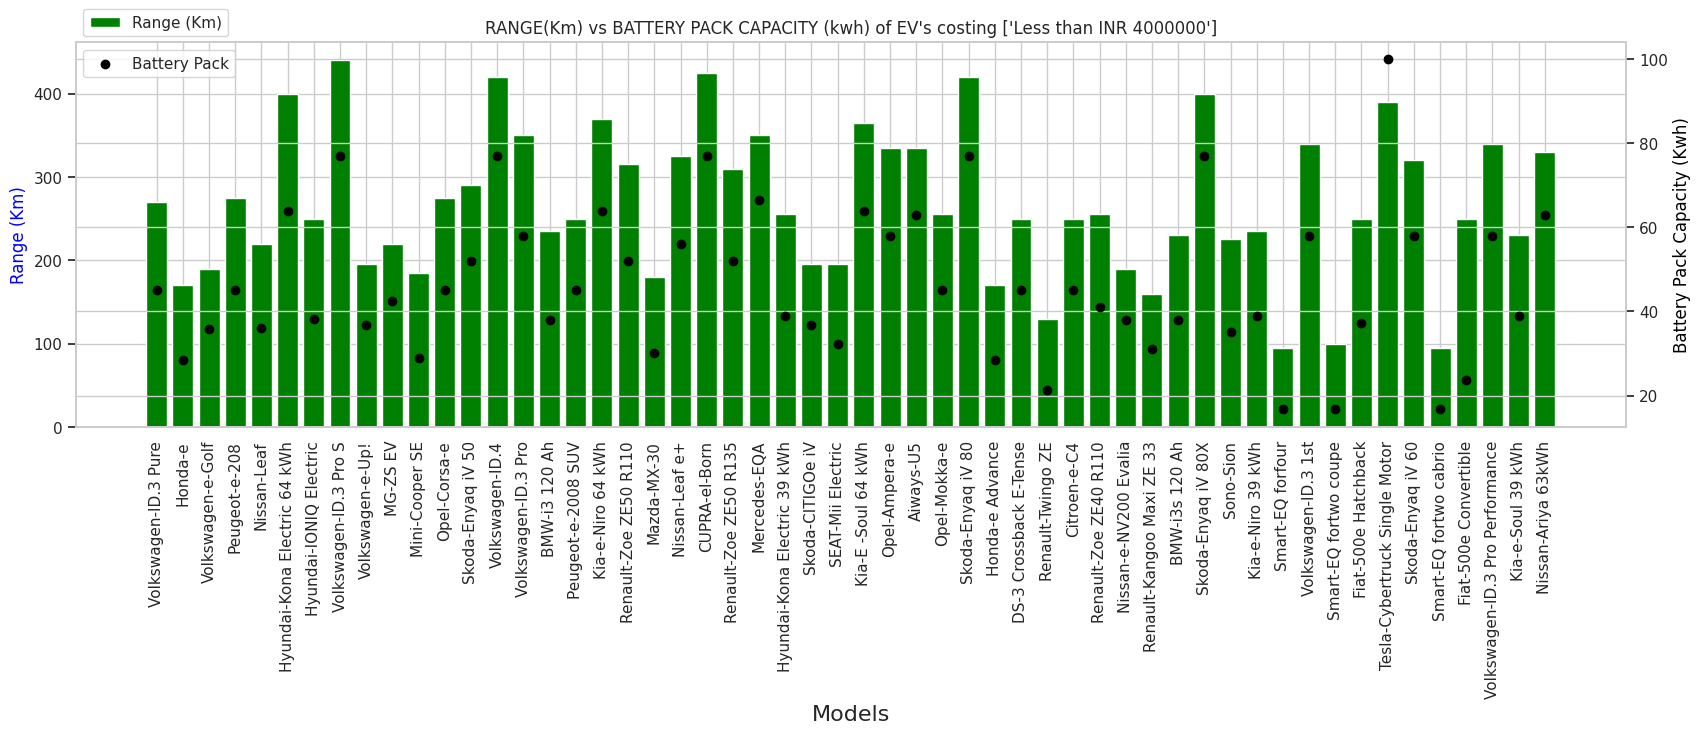

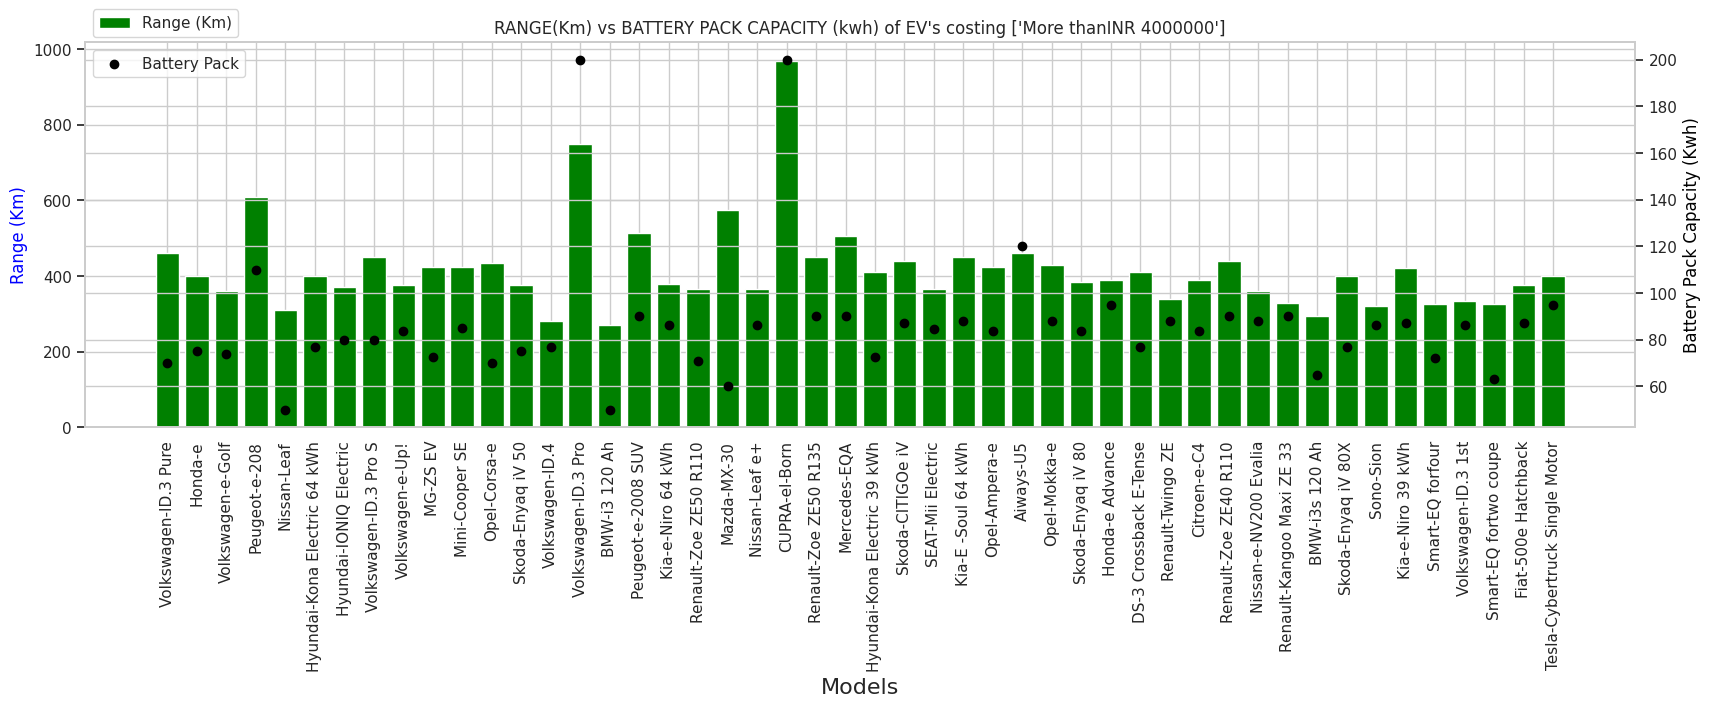

In [36]:
def range_batterypack(dataframe, text):
    fig = plt.figure(figsize=(20,5))
    a1= plt.subplot()
    a1.bar(dataframe["CarName"], dataframe["Range_Km"], label='Range (Km)', color='green')
    plt.legend(loc= "upper left", bbox_to_anchor=(0,1.105))
    a2 = a1.twinx()
    a2.scatter(dataframe["CarName"], dataframe["Battery_Pack Kwh"], label= "Battery Pack", color= 'black')
    plt.title('''RANGE(Km) vs BATTERY PACK CAPACITY (kwh) of EV's costing {}'''.format(text), fontsize=12)
    a1.set_xlabel('Models', size= 16)
    a1.set_ylabel('Range (Km)', color = 'blue')
    a2.set_ylabel('Battery Pack Capacity (Kwh)', color='black')
    plt.legend(loc='upper left', bbox_to_anchor=(0,1))
    a1.set_xticklabels(df_1['CarName'], rotation = 'vertical')
    plt.show()

range_batterypack(df_1, t1)
range_batterypack(df_2, t2)

Range of Vehicle Price

<ipython-input-37-58e8271f6b77>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  a1.set_xticklabels(df_1['CarName'], rotation = 'vertical')


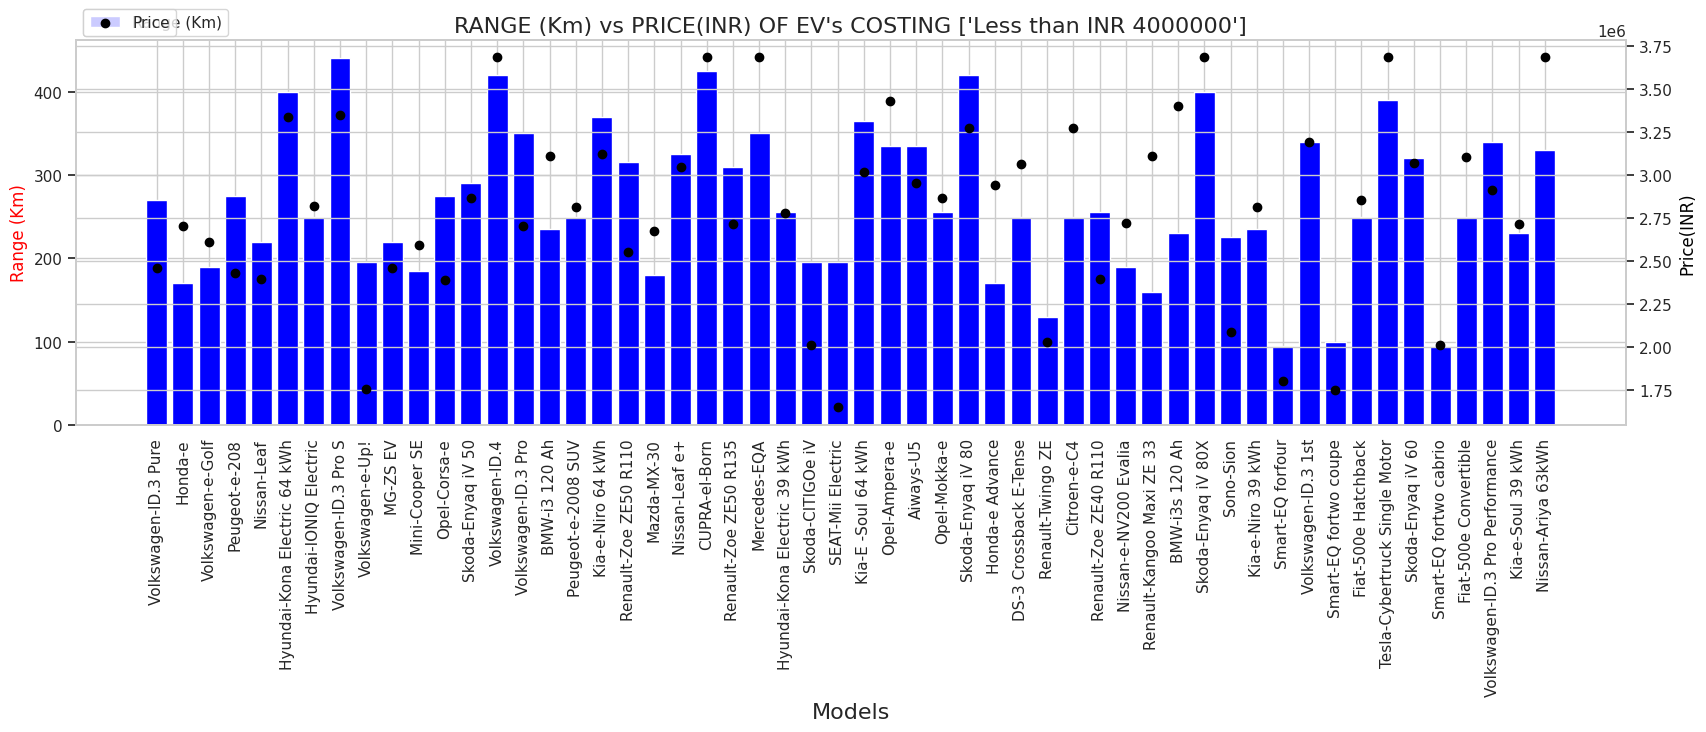

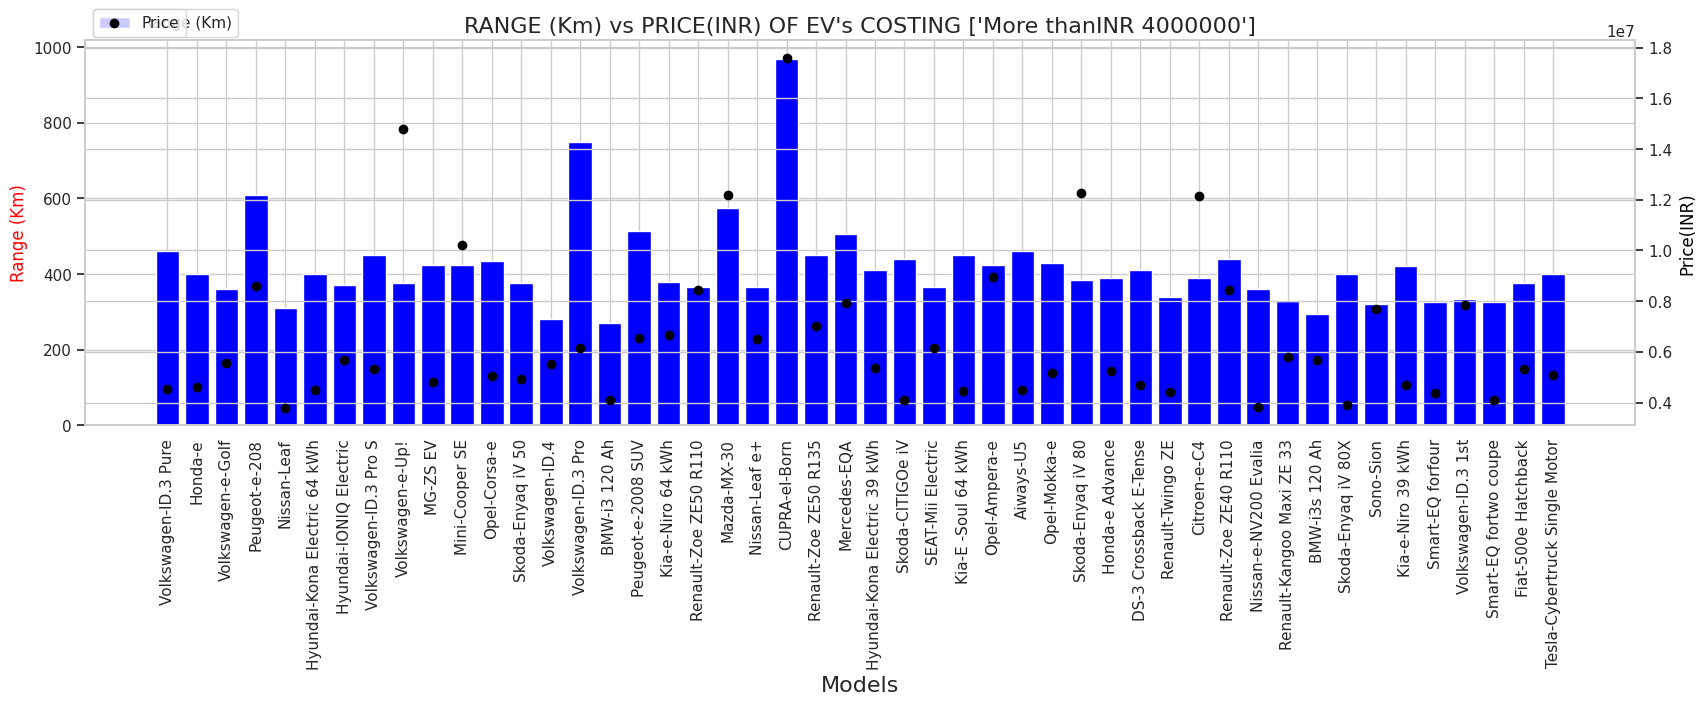

In [37]:
def range_price(dataframe, text):
    fig = plt.figure(figsize=(20, 5))
    a1 = plt.subplot()
    a1.bar(dataframe['CarName'], dataframe['Range_Km'], label='Range (Km)', color='blue')
    plt.legend(loc='upper left', bbox_to_anchor = (0, 1.1))
    a2= a1.twinx()
    a2.scatter(dataframe['CarName'], dataframe['INR'], label = 'Price', color = 'black')
    plt.title('''RANGE (Km) vs PRICE(INR) OF EV's COSTING {}'''.format(text), fontsize=16)
    a1.set_xlabel('Models', size=16)
    a1.set_ylabel('Range (Km)', color = 'red')
    a2.set_ylabel('Price(INR)', color= 'black')
    plt.legend(loc = 'upper left', bbox_to_anchor = (0,1.1))
    a1.set_xticklabels(df_1['CarName'], rotation = 'vertical')
    plt.show()

range_price(df_1, t1)
range_price(df_2, t2)

Accelaration

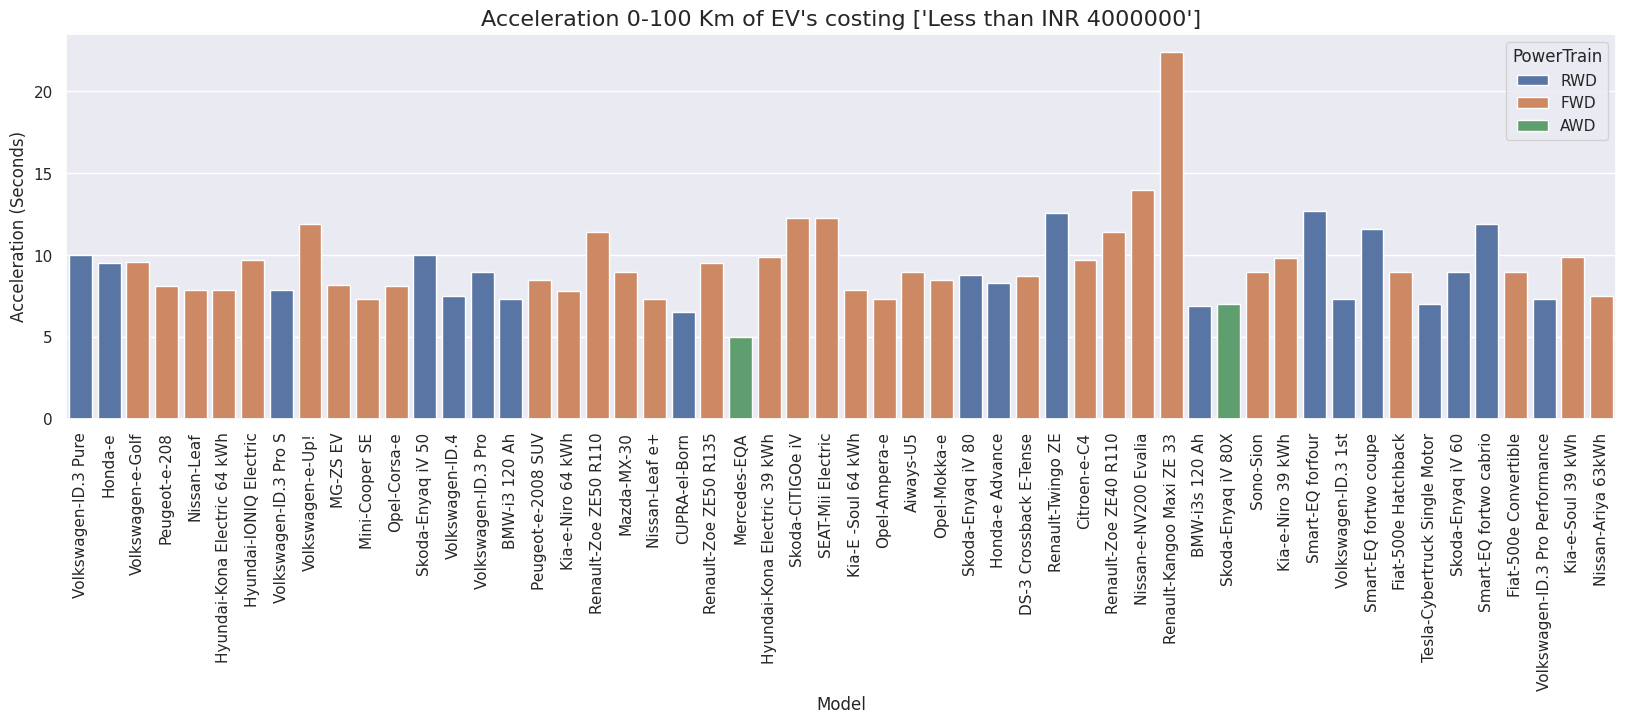

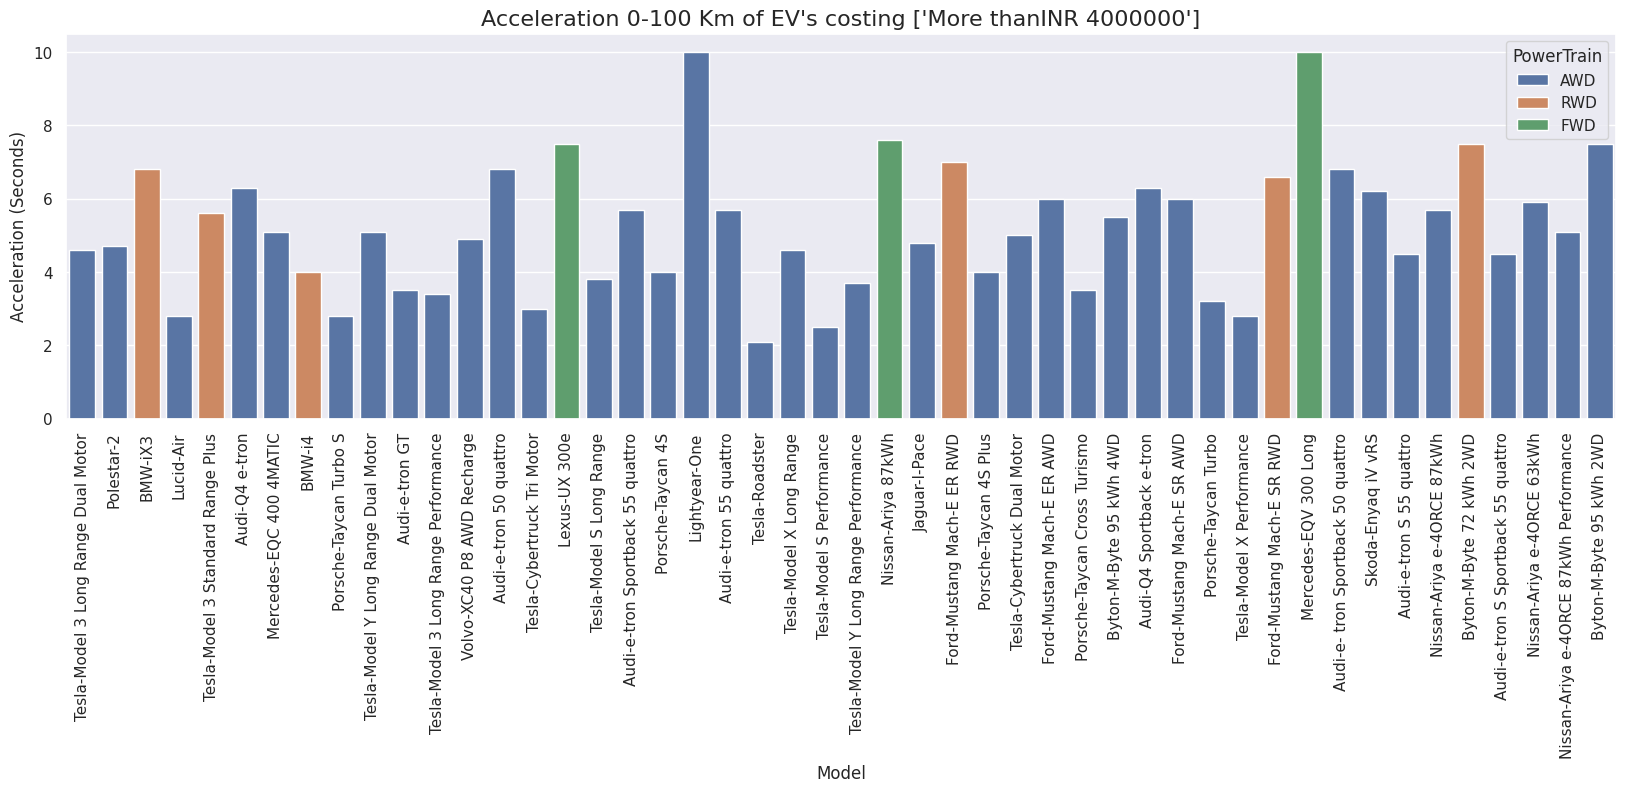

In [42]:
def acc(dataframe, text):
    plt.figure(figsize=(20,5))
    sns.set_theme(style="darkgrid")
    sns.barplot(x='CarName', y='AccelSec', data=dataframe, hue='PowerTrain')
    plt.title('''Acceleration 0-100 Km of EV's costing {}'''.format(text), fontsize=16)
    plt.ylabel('Acceleration (Seconds)')
    plt.xlabel('Model')
    plt.xticks(rotation=90)
    plt.show()

acc(df_1, t1)
acc(df_2, t2)


Fast Charging Vehicles

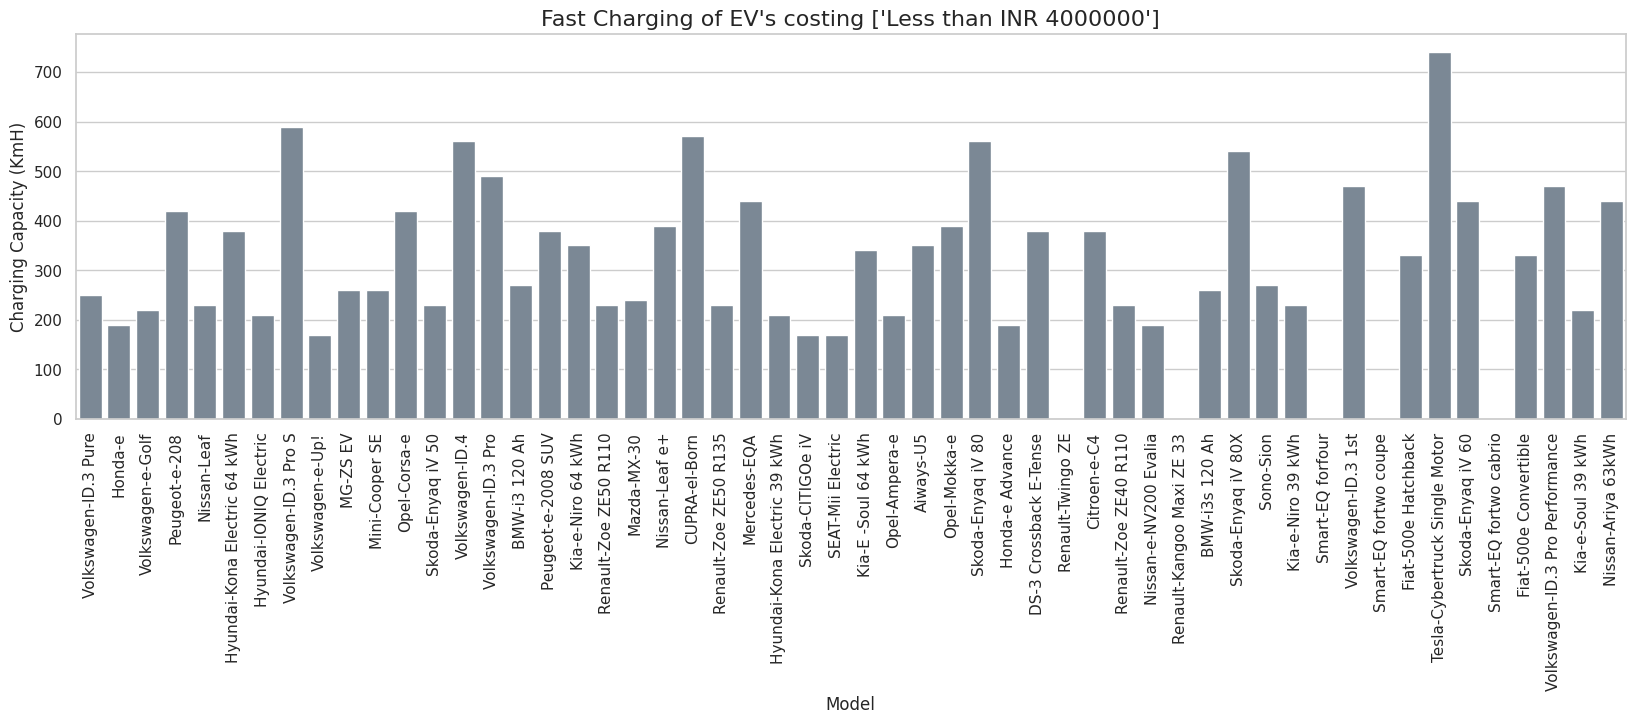

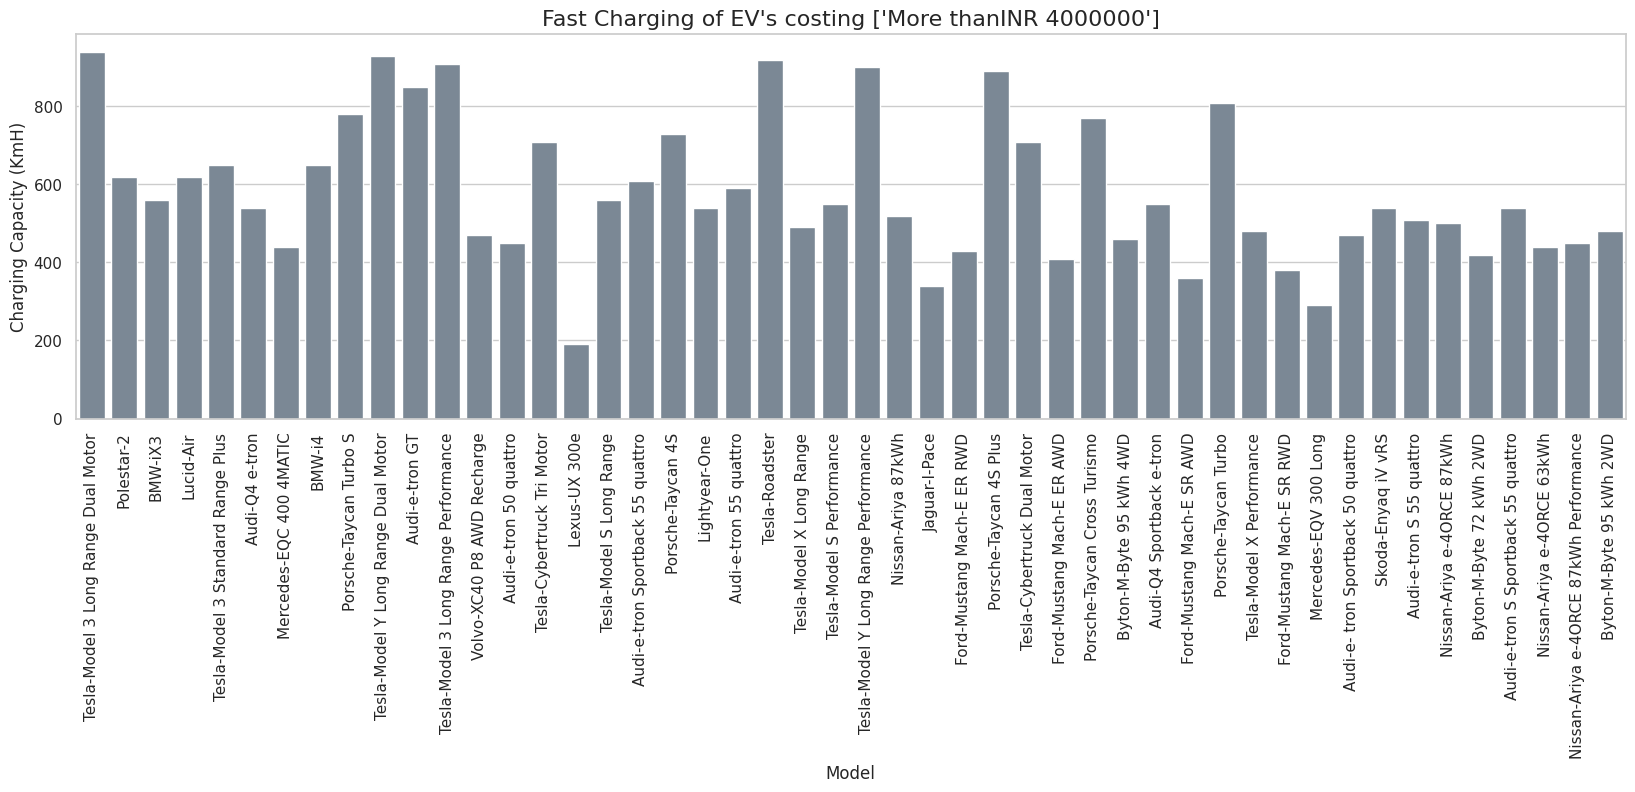

In [46]:
def fastcharge(dataframe, price):
    plt.figure(figsize=(20, 5))
    sns.set_theme(style="whitegrid")
    sns.barplot(x='CarName', y='FastCharge_KmH', data=dataframe, color = 'lightslategrey')
    plt.title('''Fast Charging of EV's costing {}'''.format(price), fontsize = 16)
    plt.ylabel('Charging Capacity (KmH)')
    plt.xlabel('Model')
    plt.xticks(rotation=90)
    plt.show()

fastcharge(df_1, t1)
fastcharge(df_2, t2)

***Basic Analysis***

Best Vehicles under INR 3750000 with max Range

In [47]:
pd.set_option('display.max_columns', None)
top_range_1 = df_1.sort_values(by= 'Range_Km', ascending= False)
print(top_range_1[['CarName', 'Range_Km', 'Battery_Pack Kwh', 'INR', 'RapidCharge']])

                            CarName  Range_Km  Battery_Pack Kwh          INR  \
15            Volkswagen-ID.3 Pro S       440              77.0  3350574.758   
37                    CUPRA-el-Born       425              77.0  3683209.500   
53                Skoda-Enyaq iV 80       420              77.0  3273964.000   
25                  Volkswagen-ID.4       420              77.0  3683209.500   
12     Hyundai-Kona Electric 64 kWh       400              64.0  3339034.035   
71               Skoda-Enyaq iV 80X       400              77.0  3683209.500   
86    Tesla-Cybertruck Single Motor       390             100.0  3683209.500   
31                Kia-e-Niro 64 kWh       370              64.0  3118859.956   
45               Kia-E -Soul 64 kWh       365              64.0  3015075.297   
39                     Mercedes-EQA       350              66.5  3683209.500   
26              Volkswagen-ID.3 Pro       350              58.0  2701020.300   
94  Volkswagen-ID.3 Pro Performance     

Vehicles with best Accelaration under INR 3750000

In [49]:
pd.set_option('display.max_columns', None)
acceleration_1 = df_1.sort_values(by= 'AccelSec')
print(acceleration_1[['CarName', 'AccelSec', 'Range_Km', 'PowerTrain', 'Battery_Pack Kwh', 'INR']])

                            CarName  AccelSec  Range_Km PowerTrain  \
39                     Mercedes-EQA       5.0       350        AWD   
37                    CUPRA-el-Born       6.5       425        RWD   
70                   BMW-i3s 120 Ah       6.9       230        RWD   
71               Skoda-Enyaq iV 80X       7.0       400        AWD   
86    Tesla-Cybertruck Single Motor       7.0       390        RWD   
80              Volkswagen-ID.3 1st       7.3       340        RWD   
46                    Opel-Ampera-e       7.3       335        FWD   
28                    BMW-i3 120 Ah       7.3       235        RWD   
19                   Mini-Cooper SE       7.3       185        FWD   
35                   Nissan-Leaf e+       7.3       325        FWD   
94  Volkswagen-ID.3 Pro Performance       7.3       340        RWD   
25                  Volkswagen-ID.4       7.5       420        RWD   
97               Nissan-Ariya 63kWh       7.5       330        FWD   
31                Ki

Vehicles with maximum efficiency

In [50]:
pd.set_option('display.max_columns', None)
efficiency = df.sort_values(by = 'Efficiency_WhKm')
print(efficiency[['CarName', 'Efficiency_WhKm', 'Range_Km', 'PowerTrain', 'Battery_Pack Kwh', 'INR']])

                               CarName  Efficiency_WhKm  Range_Km PowerTrain  \
48                       Lightyear-One              104       575        AWD   
14              Hyundai-IONIQ Electric              153       250        FWD   
8    Tesla-Model 3 Standard Range Plus              153       310        RWD   
41        Hyundai-Kona Electric 39 kWh              154       255        FWD   
74                           Sono-Sion              156       225        FWD   
..                                 ...              ...       ...        ...   
98  Audi-e-tron S Sportback 55 quattro              258       335        AWD   
67         Tesla-Cybertruck Dual Motor              261       460        AWD   
33          Tesla-Cybertruck Tri Motor              267       750        AWD   
90            Audi-e-tron S 55 quattro              270       320        AWD   
84               Mercedes-EQV 300 Long              273       330        FWD   

    Battery_Pack Kwh           INR  
48

***Analysis Based on Clustering***

Clustering the segments

In [68]:
features = ['Range_Km', 'AccelSec', 'INR']
cleaned_data = df[features].dropna()

In [69]:
cleaned_data

,Range_Km,AccelSec,INR
0,460,4.6,4540988.068
1,270,10.0,2455473.000
2,400,4.7,4619563.204
3,360,6.8,5569012.764
4,170,9.5,2700774.753
...,...,...,...
97,330,7.5,3683209.500
98,335,4.5,7861606.055
99,325,5.9,4092455.000
100,375,5.1,5320191.500


In [70]:
sc = StandardScaler()
scaled_data = sc.fit_transform(cleaned_data)

In [71]:
scaled_data

array([[ 0.96267816, -0.92514537, -0.01518637],
       [-0.54432529,  0.86470384, -0.76278597],
       [ 0.48678233, -0.89200001,  0.01298065],
       [ 0.16951845, -0.19594754,  0.35333211],
       [-1.33748501,  0.69897706, -0.67485206],
       [ 2.15241773, -1.52176177,  1.4377623 ],
       [-1.17885307,  0.73212241, -0.70703875],
       [-0.50466731,  0.23494208, -0.7721163 ],
       [-0.22706141, -0.59369181, -0.28218623],
       [ 0.48678233, -0.36167432, -0.02926988],
       [ 0.24883442, -0.75941859,  0.3957    ],
       [-0.94090515,  0.16865137, -0.78526091],
       [ 0.48678233,  0.16865137, -0.44605372],
       [ 0.88336219, -1.1240175 ,  0.26413656],
       [-0.70295724,  0.76526777, -0.63195604],
       [ 0.80404622,  0.16865137, -0.44191669],
       [ 0.28849241, -1.52176177,  3.66122563],
       [-1.13919508,  1.49446559, -1.01449936],
       [-0.94090515,  0.26808744, -0.76278597],
       [-1.21851105, -0.03022077, -0.71346435],
       [-0.50466731,  0.23494208, -0.787

Applying PCA to reduce Dimensionality

In [72]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

In [73]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [74]:
cleaned_data['Cluster'] = kmeans.labels_

Visualizing the Clustered Data

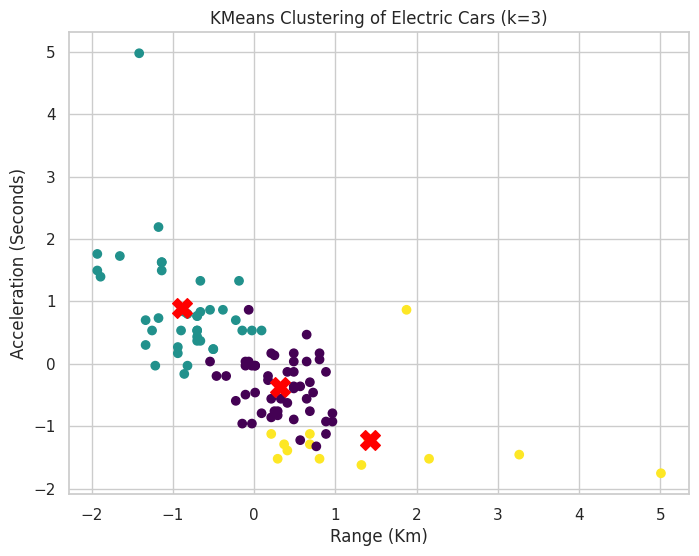

In [75]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cleaned_data['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title(f'KMeans Clustering of Electric Cars (k={k})')
plt.xlabel('Range (Km)')
plt.ylabel('Acceleration (Seconds)')
plt.show()